In [6]:
#!pip install retina-face

In [85]:
from retinaface import RetinaFace
import math
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from deepface import DeepFace
from deepface.commons import functions
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

In [67]:
img_path = "images/m2.jpg"

In [68]:
img = cv2.imread(img_path)

In [69]:
resp = RetinaFace.detect_faces(img_path = img_path)

In [70]:
resp

{'face_1': {'score': 0.9990549683570862,
  'facial_area': [272, 190, 475, 463],
  'landmarks': {'right_eye': [328.89908, 296.73566],
   'left_eye': [421.4121, 315.89526],
   'nose': [360.4036, 353.77512],
   'mouth_right': [316.97882, 395.56097],
   'mouth_left': [388.28537, 411.68753]}}}

In [72]:
x1,y1 = resp["face_1"]["landmarks"]["right_eye"]
x2,y2 = resp["face_1"]["landmarks"]["left_eye"]

In [73]:
a = abs(y1 -y2)
b = abs(x2 - x1)
c = math.sqrt(a*a + b*b)

In [74]:
a ,b ,c

(19.159607, 92.51303, 94.47619781259722)

In [75]:
cos_alpha = (b*b + c*c - a*a)/(2 * b * c)

In [76]:
cos_alpha

0.9792205559188214

In [77]:
alpha = np.arccos(cos_alpha) #radius value

In [78]:
alpha

0.20421464074603035

In [79]:
alpha = (alpha * 180) / math.pi # convert into degree

In [80]:
alpha

11.700637029527874

In [81]:
aligned_img = Image.fromarray(img)

In [82]:
aligned_img = np.array(aligned_img.rotate(alpha))

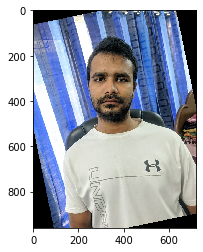

In [83]:
plt.imshow(aligned_img[:,:,::-1])

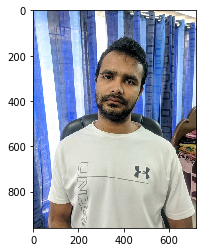

In [84]:
plt.imshow(img[:,:,::-1])

In [86]:
#face detection and align using haarcascase
#backends = ['opencv', 'ssd', 'dlib', 'mtcnn']
backends = ['opencv', 'ssd', 'dlib', 'mtcnn']
detected_face = DeepFace.detectFace(aligned_img, detector_backend = backends[3])

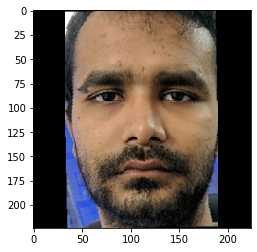

In [87]:
plt.imshow(detected_face)

Text(0.5, 1.0, 'Detected Face')

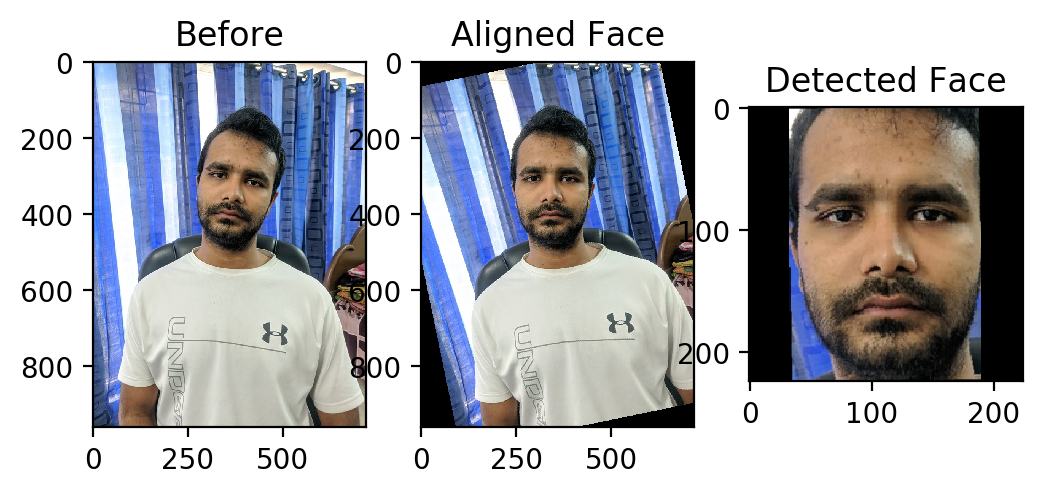

In [108]:
fig = plt.figure(dpi=200)

ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img[:,:,::-1])
ax.set_title('Before')

ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(aligned_img[:,:,::-1])
ax.set_title('Aligned Face')

ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(detected_face)
ax.set_title('Detected Face')